In [92]:
import numpy as np
import numba
%matplotlib inline
n = 10000000
results = [ ]

In [93]:
x = np.random.rand(n)
y = np.empty(x.shape)

In [94]:
x_list = list(x)
y_list = list(y)

In [95]:
%%timeit -o
for i in range(len(x)):
    y_list[i] = 2 * x_list[i] + 1

5.7 s ± 120 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<TimeitResult : 5.7 s ± 120 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>

In [96]:
results.append(_.average)

In [97]:
%%timeit -o
y_list = [ 2*a+1 for a in x_list]

4.4 s ± 112 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<TimeitResult : 4.4 s ± 112 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>

In [98]:
results.append(_.average)

In [99]:
results

[5.704674419213656, 4.397794176740457]

In [100]:
%%timeit -o
for i in range(len(x)):
    y[i] = 2 * x[i] + 1

6.32 s ± 102 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<TimeitResult : 6.32 s ± 102 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>

In [101]:
results.append(_.average)

In [102]:
%%timeit -o
y = 2 * x + 1

66 ms ± 6.78 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


<TimeitResult : 66 ms ± 6.78 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)>

In [103]:
results.append(_.average)

In [104]:
@numba.jit
def f():
    y = 2 * x + 1

In [105]:
%%timeit -o
f()

33.4 ms ± 6.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


<TimeitResult : 33.4 ms ± 6.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)>

In [106]:
results.append(_.average)

In [107]:
from numba import cuda

In [108]:
@cuda.jit
def f():
    y = 2 * x + 1

In [109]:
results.append(_.average)

In [110]:
import matplotlib.pyplot as plt

<Container object of 6 artists>

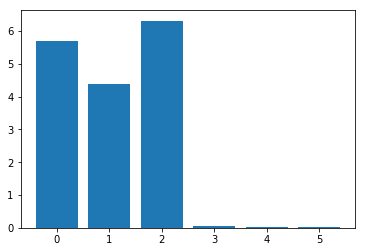

In [111]:
plt.figure();
plt.bar(np.arange(len(results)), results)